In [244]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

In [245]:
m_data = pd.read_csv('MultipleLR.csv',header=None,names=['X1','X2','X3','Y'])
m_data.head()

,X1,X2,X3,Y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [246]:
m_data.insert(0,'X0',1)
m_data.head()

,X0,X1,X2,X3,Y
0,1,73,80,75,152
1,1,93,88,93,185
2,1,89,91,90,180
3,1,96,98,100,196
4,1,73,66,70,142


In [247]:
X = m_data.iloc[:,:4]
Y = m_data.iloc[:,4]

In [248]:
x = np.array(X)
y = np.array(Y).reshape(len(Y),1)

In [6]:
x.shape

(25, 4)

In [7]:
y.shape

(25, 1)

In [8]:
theta = np.array(np.zeros((1,x.shape[1])))
theta

array([[0., 0., 0., 0.]])

In [9]:
theta.shape

(1, 4)

In [10]:
def ComputeCost(X,y,theta):
    z = np.power(((X @ theta.T) - y),2)
    return np.sum(z) / (2 * len(X))  

In [11]:
def MGD(X,y,theta,lr,iterations,batch_size = 100):
    m = len(y)
    cost_hist = []
    thetas = []
    for itr in range(iterations):
        cost = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            pred = np.dot(X_i,theta.T)
            theta = theta -(1/m) * lr * (X_i.T.dot((pred - y_i)).T)
            cost += ComputeCost(X_i,y_i,theta)
        cost_hist.append(cost)
        thetas.append(theta)
        if itr > 0:
            if np.abs(cost_hist[itr-1] - cost_hist[itr]) < 0.001:
                break
    return theta ,cost_hist ,thetas
    

In [12]:
new_theta,cost_hist,thetas = MGD(x,y,theta,lr=0.00005,iterations=900)


In [13]:
thetas = np.squeeze(np.array(thetas))
thetas.shape

(865, 4)

In [14]:
cost_hist[-1]

3.6187020469000193

In [15]:
f = x @ new_theta.T                                                                                                                                                           

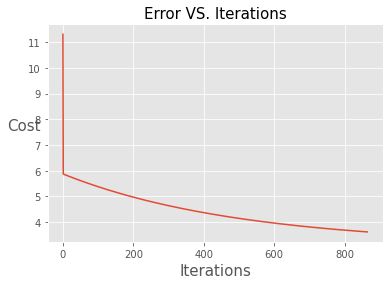

In [16]:
# draw Error Graph
plt.plot(cost_hist)
plt.xlabel("Iterations",fontsize=15)
plt.ylabel("Cost",rotation=0,fontsize=15)
plt.title("Error VS. Iterations",fontsize=15)
plt.show()

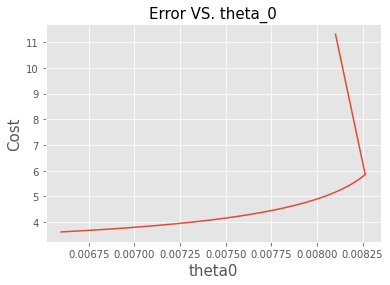

In [17]:
# draw Error and theta0 graph 
plt.plot(thetas[:,0],cost_hist)
plt.xlabel("theta0",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_0",fontsize=15)
plt.show()

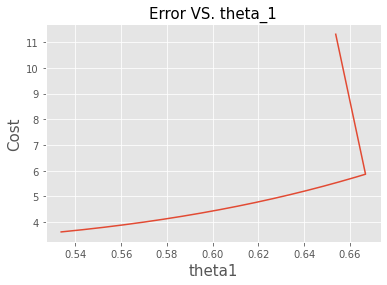

In [18]:
# draw Error and theta1 graph 
plt.plot(thetas[:,1],cost_hist)
plt.xlabel("theta1",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_1",fontsize=15)
plt.show()

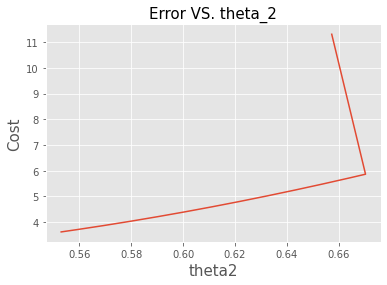

In [19]:
# draw Error and theta2 graph 
plt.plot(thetas[:,2],cost_hist)
plt.xlabel("theta2",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_2",fontsize=15)
plt.show()

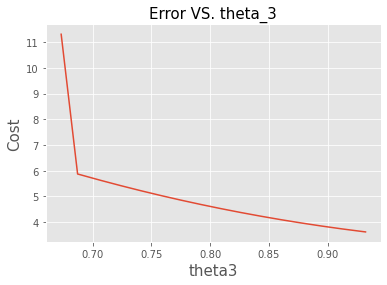

In [20]:
# draw Error and theta3 graph 
plt.plot(thetas[:,3],cost_hist)
plt.xlabel("theta3",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_3",fontsize=15)
plt.show()

In [21]:
# use R2 score to evaluate LR equation output
from sklearn.metrics import r2_score

r2_score(y,f)

0.986959594669462

In [249]:
x = np.array(X)
y = np.array(Y).reshape(len(Y),1)

In [250]:
theta = np.array(np.ones((1,x.shape[1])))
theta

array([[1., 1., 1., 1.]])

In [251]:
def ComputeCost(X,y,theta):
    z = np.power(((X @ theta.T) - y),2)
    return np.sum(z) / (2 * len(X))  

In [252]:
# get gradient
def GetGradient(X,y,theta):
    pre = X @ theta.T
    grad = X.T @ (pre - y)
    return grad

In [253]:
def Adam(x,y,theta,v,m,gama1,gama2):
    if len(m)== 0 & len(v)==0:
        m.append(np.array([[0],[0]]))
        v.append(np.array([[0],[0]]))
        return v,m

    m.append((gama1 * v[-1]) + ((1-gama1 )* GetGradient(x,y,theta).T))
   
    v.append (((gama2*v[-1]) + ((1-gama2)*np.power(GetGradient(x,y,theta).T,2))))
    return v[-1],m[-1]
    

In [254]:
def MBatch_Adam_GD(X,y,Theta,lr,iteration,gama1,gama2,batch_size = 5):  
    costs = []                   
    thetas = []
    costs_itr = []
    thetas_itr = []
    h=[]
    vt=[]
    mt=[]
    eps=0.001
    for i in range(iteration):
        cost = 0
        indices = np.random.permutation(len(y))
        X = X[indices]
        y = y[indices]
        for j in range(0,len(y),batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            v,m=Adam(X_i,y_i,Theta,vt,mt,gama1,gama2)
            vt.append(v[-1]* (1/(1-gama2**(i+1))))
            mt.append(m[-1]* (1/(1-gama1**(i+1))))
            Theta = Theta - (lr * mt[-1])/(np.sqrt(vt[-1])+eps)
            cost += ComputeCost(X_i,y_i,theta)
            costs_itr.append(cost)
            thetas_itr.append(Theta[0])
        costs.append( ComputeCost(X,y,Theta) )
        thetas.append(Theta[0])
        h.append(X @ Theta.T)
        
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 0.0001:
                break
            if np.linalg.norm(GetGradient(X,y,Theta)) < 0.0001:
                break;
        
    return Theta[0], costs,thetas,h,costs_itr,thetas_itr

In [255]:
alpha=0.0000005
gama1=0.5
gama2=0.4
itera=100

In [256]:
th_op , costs, thetas , h,costs_itr,thetas_itr=MBatch_Adam_GD(x,y,theta,alpha,itera,gama1,gama2)
costs[-1]

C:\Users\Alhasan Gamal\AppData\Local\Temp\ipykernel_14736\2991561872.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(z) / (2 * len(X))


18.931013009390718

In [201]:
len(costs_itr)

145

In [203]:
len(costs)

29

In [191]:
f = x @ th_op.T

In [192]:
thetas = np.array(thetas).reshape(len(costs),x.shape[1])

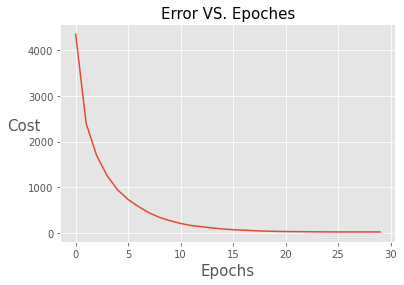

In [193]:
# draw Error Graph
plt.plot(costs)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Cost",rotation=0,fontsize=15)
plt.title("Error VS. Epoches",fontsize=15)
plt.show()

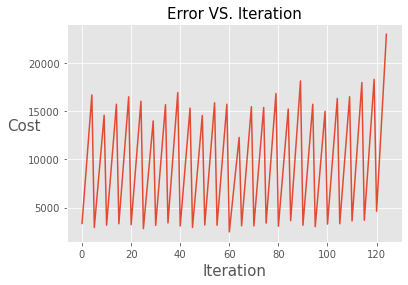

In [194]:
plt.plot(costs_itr)
plt.xlabel("Iteration",fontsize=15)
plt.ylabel("Cost",rotation=0,fontsize=15)
plt.title("Error VS. Iteration",fontsize=15)
plt.show()

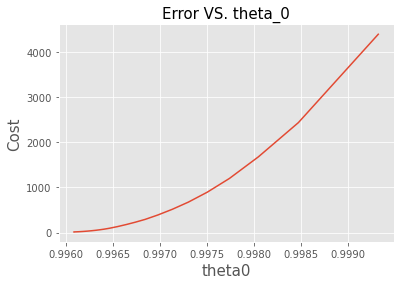

In [150]:
# draw Error and theta0 graph 
plt.plot(thetas[:,0],costs)
plt.xlabel("theta0",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_0",fontsize=15)
plt.show()

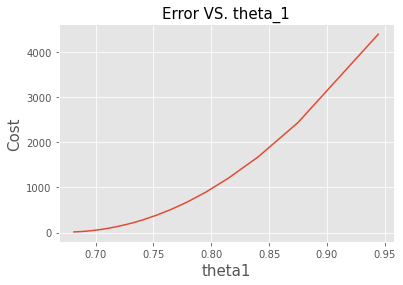

In [151]:
# draw Error and theta1 graph 
plt.plot(thetas[:,1],costs)
plt.xlabel("theta1",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_1",fontsize=15)
plt.show()

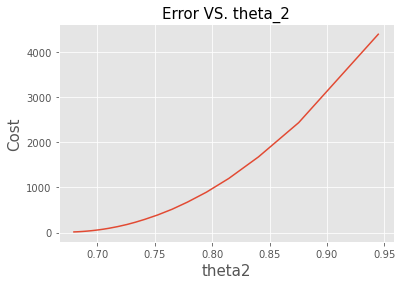

In [152]:
# draw Error and theta2 graph 
plt.plot(thetas[:,2],costs)
plt.xlabel("theta2",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_2",fontsize=15)
plt.show()

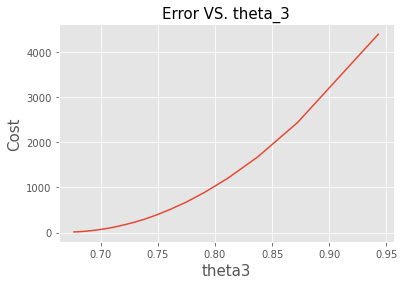

In [153]:
# draw Error and theta3 graph 
plt.plot(thetas[:,3],costs)
plt.xlabel("theta3",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_3",fontsize=15)
plt.show()

In [142]:
from sklearn.metrics import r2_score

r2_score(y,f)

0.9686593706670248

In [195]:
thetas_itr = np.array(thetas_itr).reshape(len(costs_itr),x.shape[1])

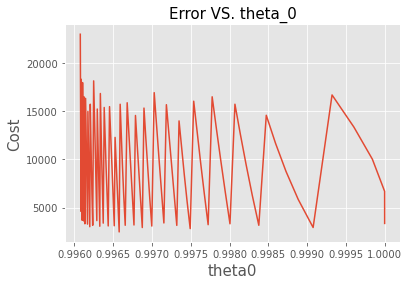

In [196]:
# draw Error and theta0 graph 
plt.plot(thetas_itr[:,0],costs_itr)
plt.xlabel("theta0",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_0",fontsize=15)
plt.show()